In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('netflix_titles.csv')
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
print(f'Dữ liệu Netflix có {raw_data.shape[1]} cột và {raw_data.shape[0]} dòng.')

Dữ liệu Netflix có 12 cột và 8807 dòng.


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
raw_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
for i in raw_data.columns:
    pct_missing = raw_data[i].isnull().mean()
    print(f'{i}: {pct_missing :.1%}')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.9%
cast: 9.4%
country: 9.4%
date_added: 0.1%
release_year: 0.0%
rating: 0.0%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


In [13]:
data_split = raw_data.copy()
# xoá hết dữ liệu cast, country, date_added, rating, duration null
data_split = data_split.dropna(subset=['cast','country','date_added','rating','duration'],how='any')
#director nulll thì đổi thành Unknown
data_split['director'].replace(np.nan,'Unknown',inplace=True)
# data_split.dropna(inplace=True)
print(f'Dữ liệu Netflix sau khi xử xử lý dữ liệu còn {data_split.shape[1]} cột và {data_split.shape[0]} dòng.')

Dữ liệu Netflix sau khi xử xử lý dữ liệu còn 12 cột và 7290 dòng.


In [14]:
#Thực hiện tách Type, Type chỉ có 2 dữ liệu là Movie và TV Show
Movie_null = data_split[(data_split.director=='Unknown') & (data_split.type=='Movie')]
Movie_null.to_csv('Movie_null.csv')
TV_null = data_split[(data_split.director=='Unknown') & (data_split.type=='TV Show')]
TV_null.to_csv('TV_null.csv')
Movie = data_split[(data_split.type=='Movie')]
Movie.to_csv('Movie.csv')
TV = data_split[(data_split.type=='TV Show')]
TV.to_csv('TV.csv')

In [15]:
#Movie null
Movie_null.shape

(92, 12)

In [16]:
#TV Show null
TV_null.shape

(1866, 12)

In [17]:
#Đổi ngày tháng năm từ chữ sáng định dạng số
data_split['date_added']=pd.to_datetime(data_split['date_added'])
data_split['year_added']=data_split['date_added'].apply(lambda x: int(x.year))
data_split['month_added']=data_split['date_added'].apply(lambda x: int(x.month))
data_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [18]:
#Bỏ lồng thuộc tính cast (trong 1 phim có nhiều diễn viên thì tách dấu phẩy ra)
cast = pd.DataFrame(data_split['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=data_split['show_id'])
cast=cast.stack().reset_index().drop('level_1',axis=1)
cast.rename(columns={0:'actor'},inplace=True)
cast.head()

,show_id,actor
0,s2,Ama Qamata
1,s2,Khosi Ngema
2,s2,Gail Mabalane
3,s2,Thabang Molaba
4,s2,Dillon Windvogel


In [19]:
#Bỏ lồng thuộc tính director
director = pd.DataFrame(data_split['director'].apply(lambda x: str(x).split(', ')).tolist(),index=data_split['show_id'])
director=director.stack().reset_index().drop('level_1',axis=1)
director.rename(columns={0:'director'},inplace=True)
director.head()

,show_id,director
0,s2,Unknown
1,s5,Unknown
2,s8,Haile Gerima
3,s9,Andy Devonshire
4,s10,Theodore Melfi


In [20]:
# Bỏ lồng thuộc tính country
country = pd.DataFrame(data_split['country'].apply(lambda x: str(x).split(', ')).tolist(),index=data_split['show_id'])
country=country.stack().reset_index().drop('level_1',axis=1)
country.rename(columns={0:'country'},inplace=True)
country.head()

,show_id,country
0,s2,South Africa
1,s5,India
2,s8,United States
3,s8,Ghana
4,s8,Burkina Faso


In [21]:
# bỏ lồng thuộc tính listed_in
genre = pd.DataFrame(data_split['listed_in'].apply(lambda x: str(x).split(', ')).tolist(),index=data_split['show_id'])
genre=genre.stack().reset_index().drop('level_1',axis=1)
genre.rename(columns={0:'genre'},inplace=True)
genre.head()

,show_id,genre
0,s2,International TV Shows
1,s2,TV Dramas
2,s2,TV Mysteries
3,s5,International TV Shows
4,s5,Romantic TV Shows


In [22]:
#hợp nhất các dữ liệu vừa tách ra thành một
temp = cast.merge(director, on=['show_id'], how='inner')
temp1 = temp.merge(country, on=['show_id'], how='inner')
temp2 = temp1.merge(genre, on=['show_id'], how='inner')
temp2.head()

,show_id,actor,director,country,genre
0,s2,Ama Qamata,Unknown,South Africa,International TV Shows
1,s2,Ama Qamata,Unknown,South Africa,TV Dramas
2,s2,Ama Qamata,Unknown,South Africa,TV Mysteries
3,s2,Khosi Ngema,Unknown,South Africa,International TV Shows
4,s2,Khosi Ngema,Unknown,South Africa,TV Dramas


In [23]:

# Hợp nhất dữ liệu từ temp2 và data_split thành 1 là data
data = temp2.merge(data_split[['show_id','type','title','date_added','release_year','rating','duration',
                             'description','year_added','month_added']],
                             on='show_id',how='inner').iloc[:,[0,5,6,1,2,3,4,7,8,9,10,11,12,13]]
data.head()

,show_id,type,title,actor,director,country,genre,date_added,release_year,rating,duration,description,year_added,month_added
0,s2,TV Show,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9
1,s2,TV Show,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9
2,s2,TV Show,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9
3,s2,TV Show,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9
4,s2,TV Show,Blood & Water,Khosi Ngema,Unknown,South Africa,TV Dramas,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9


In [24]:
# tạo data riêng cho TV Shows và Movie
movies = data[data['type']=='Movie']
tv_shows = data[data['type']=='TV Show']
tv=tv_shows['duration'].apply(lambda x:int(str(x).split(' ')[0]))
tv_shows=tv_shows.drop('duration',axis=1)
tv_shows['seasons']=tv
# tv_shows.head()

In [25]:
movie=movies['duration'].apply(lambda x:int(str(x).split(' ')[0]))
movies=movies.drop('duration',axis=1)
movies['duration']=movie
# movies.head()

In [26]:
t = movies[(movies['type']!='Unknown')&(movies['director']!='Unknown')].groupby(['type','director']).agg(
    {'show_id':'nunique'}).reset_index().sort_values(
    'show_id',ascending=False).head(80)
t1=movies.merge(t,on=['type','director'],how='inner').groupby(['type','director']).agg(
    {'show_id_x':'nunique'}).reset_index().sort_values('show_id_x',ascending=False).head(15).rename(
    {'show_id_x':'Total Movies'},axis=1)
t1

,type,director,Total Movies
18,Movie,Jan Suter,21
53,Movie,Raúl Campos,19
20,Movie,Jay Karas,15
38,Movie,Marcus Raboy,14
6,Movie,Cathy Garcia-Molina,13
39,Movie,Martin Scorsese,12
77,Movie,Youssef Chahine,12
19,Movie,Jay Chapman,12
68,Movie,Steven Spielberg,11
12,Movie,Don Michael Paul,10


In [27]:
# raw_data['date_added']=pd.to_datetime(raw_data['date_added'])
# raw_data['year_added']=raw_data['date_added'].apply(lambda x: int(x.year))
# raw_data['month_added']=raw_data['date_added'].apply(lambda x: int(x.month))
# raw_data.head()

Text(0.5, 1.0, 'Top Genre in Netflix')

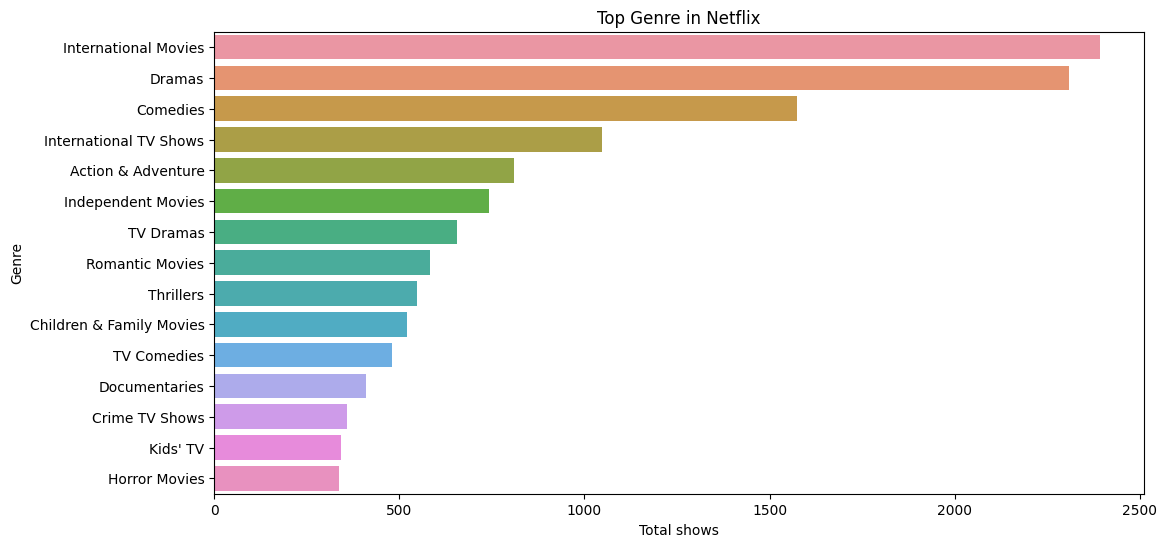

In [28]:
ra = data.groupby(['genre']).agg({'show_id':'nunique'}).reset_index().sort_values('show_id',ascending=False).head(15)
plt.figure(figsize=(12,6))
r=sns.barplot(data=ra,x='show_id', y='genre')
plt.ylabel('Genre',fontsize=10)
plt.xlabel(xlabel='Total shows',fontsize=10)
plt.title('Top Genre in Netflix')

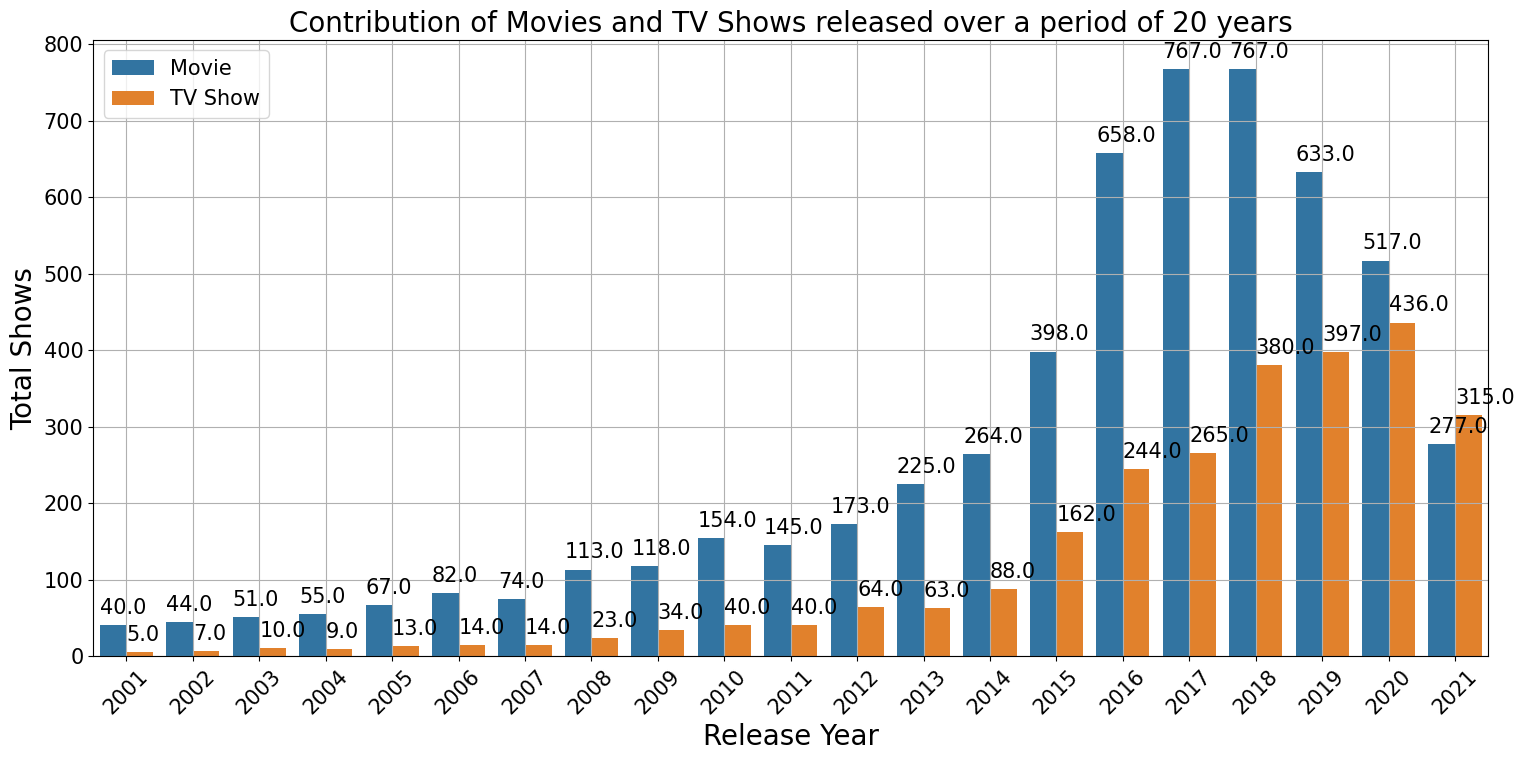

In [30]:
plt.figure(figsize=(18,8))
gr = sns.countplot(data=raw_data[(raw_data['release_year'].max() - raw_data['release_year'])<=20],
           x='release_year', hue='type')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Total Shows',fontsize=20)
plt.legend(fontsize=15,loc='upper left')
plt.grid()
plt.title('Contribution of Movies and TV Shows released over a period of 20 years',fontsize=20)
for p in gr.patches:
    gr.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+15),fontsize=15)
plt.show()

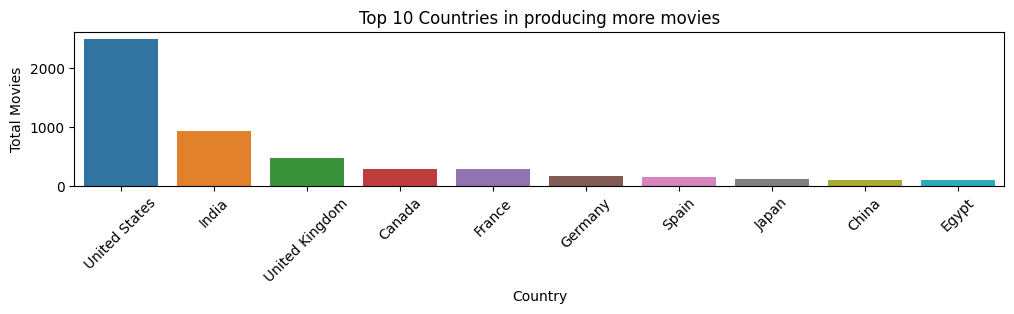

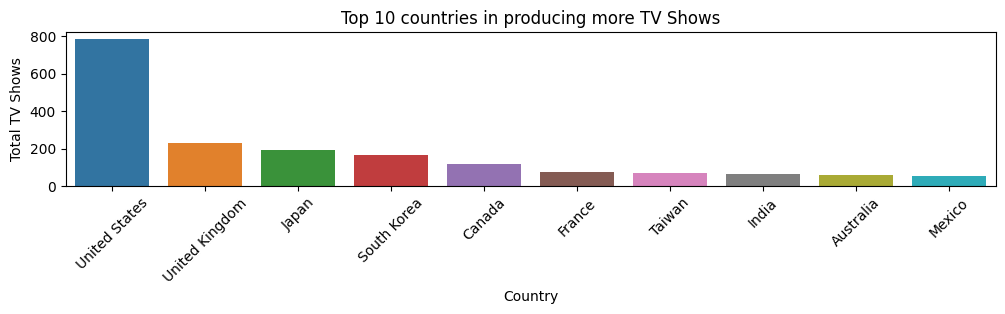

In [32]:
plt.figure(figsize=(12,2))
m=movies[movies['country']!='Unknown'].groupby(['country']).agg({'show_id':'nunique'}).reset_index().sort_values(
    ['show_id'], ascending=False).head(10)
sns.barplot(data=m,x='country',y='show_id')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Total Movies')
plt.title('Top 10 Countries in producing more movies')
plt.show()

plt.figure(figsize=(12,2))
t=tv_shows[tv_shows['country']!='Unknown'].groupby(['country']).agg({'show_id':'nunique'}).reset_index().sort_values(
    ['show_id'], ascending=False).head(10)
sns.barplot(data=t,x='country',y='show_id')
plt.title('Top 10 countries in producing more TV Shows')
plt.ylabel('Total TV Shows')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.show()

In [ ]:
raw_data.dropna(subset=['cast','country','date_added','rating','duration'],how='any')
raw_data.to_csv('data_netflix.csv')